<a href="https://colab.research.google.com/github/SangeethaKaveti/sangeetha_INFO5731_Spring2023/blob/main/INFO5731_Assignment_Three_fall2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Three**

In this assignment, you are required to conduct information extraction, semantic analysis based on **the dataset you collected from assignment two**. You may use scipy and numpy package in this assignment.

# **Question 1: Understand N-gram**

(45 points). Write a python program to conduct N-gram analysis based on the dataset in your assignment two:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the **noun phrases** and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets). 


In [21]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all


       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger.zip.
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_ru.zip.
       | Downloading package basque_grammars to /root/nltk_data...
       |   Unzipping grammars/basque_grammars.zip.
       | Downloading package bcp47 to /root/nltk_data...
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Unzipping corpora/biocreative_ppi.zip.
       | Downloading package bllip_wsj_no_aux to /root/nltk_data...
       |   Unzipping models/bllip_wsj_no_aux.zip.
       | Downloading package book_grammars to /root/nltk_data...
       |   Un


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [22]:
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium

Get:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Hit:2 http://archive.ubuntu.com/ubuntu focal InRelease
Get:3 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease [1,581 B]
Get:5 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Get:7 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  Packages [972 kB]
Hit:10 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:11 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Get:12 http://security.ubuntu.com/ubuntu focal-security/multiverse amd64 Packages [28.5 kB]
Get:13 http://security.ubuntu.com/ubuntu focal-security/re

In [23]:
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait as wait
from selenium.webdriver.common.by import By
import pandas as pd
import time
options = webdriver.ChromeOptions()
options.add_argument('-headless')
options.add_argument('-no-sandbox')
options.add_argument('-disable-dev-shm-usage')

In [57]:
reviews=pd.read_csv('data.csv')
print(reviews)

                                               reviews
0    The 'minor visual blemishes' for me were that ...
1    The 'minor visual blemishes' for me were that ...
2    I ordered this phone after my last one broke. ...
3    The 'minor visual blemishes' for me were that ...
4    I ordered this phone after my last one broke. ...
..                                                 ...
105  This was my "first expensive" purchase with an...
106  The only thing about it is the battery life do...
107  This iphon11 came in like new condition and th...
108  En términos generales, el celular se ve en muy...
109  For me my biggest worry was the battery life, ...

[110 rows x 1 columns]


In [58]:
#Lower Case
reviews['After Converting to lower case'] = reviews['reviews'].apply(lambda x: " ".join(x.lower() for x in x.split()))
reviews

#Punctuation Removal
reviews['After Removing Punctuation'] = reviews['After Converting to lower case'].str.replace('[^\w\s]','')
reviews

#Special Charachters Removal
import re
reviews['After Removing Special Charachters'] = reviews['After Removing Punctuation'].apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', charctr) for charctr in x ))
reviews

#Stopwords Removal
from nltk.corpus import stopwords
stop = stopwords.words('english')
reviews['After Removing Stopwords'] =reviews['After Removing Punctuation'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
reviews

#Spelling Correction
from textblob import TextBlob
reviews['After Spelling Correction'] = reviews['After Removing Stopwords'].apply(lambda x: str(TextBlob(x).correct()))
reviews

#Tokenization
import nltk
nltk.download('punkt')
reviews['After Tokenization'] = reviews['After Spelling Correction'].apply(lambda x: TextBlob(x).words)
reviews


#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
reviews['After Stemming'] = reviews['After Tokenization'].apply(lambda x: " ".join([ps.stem(word) for word in x]))
reviews

#Lemmatization
from textblob import Word
import nltk
nltk.download('wordnet')
reviews['After Lemmatization'] =reviews['After Stemming'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
reviews.to_csv('reviews.csv',index=False)
reviews

<ipython-input-58-ae32cb71c92d>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  reviews['After Removing Punctuation'] = reviews['After Converting to lower case'].str.replace('[^\w\s]','')
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,reviews,After Converting to lower case,After Removing Punctuation,After Removing Special Charachters,After Removing Stopwords,After Spelling Correction,After Tokenization,After Stemming,After Lemmatization
0,The 'minor visual blemishes' for me were that ...,the 'minor visual blemishes' for me were that ...,the minor visual blemishes for me were that th...,the minor visual blemishes for me were that th...,minor visual blemishes edges case bit scuffed ...,minor visual blemishes edges case bit stuffed ...,"[minor, visual, blemishes, edges, case, bit, s...",minor visual blemish edg case bit stuf dont kn...,minor visual blemish edg case bit stuf dont kn...
1,The 'minor visual blemishes' for me were that ...,the 'minor visual blemishes' for me were that ...,the minor visual blemishes for me were that th...,the minor visual blemishes for me were that th...,minor visual blemishes edges case bit scuffed ...,minor visual blemishes edges case bit stuffed ...,"[minor, visual, blemishes, edges, case, bit, s...",minor visual blemish edg case bit stuf dont kn...,minor visual blemish edg case bit stuf dont kn...
2,I ordered this phone after my last one broke. ...,i ordered this phone after my last one broke. ...,i ordered this phone after my last one broke t...,i ordered this phone after my last one broke t...,ordered phone last one broke last ive bought s...,ordered phone last one broke last give bought ...,"[ordered, phone, last, one, broke, last, give,...",order phone last one broke last give bought se...,order phone last one broke last give bought se...
3,The 'minor visual blemishes' for me were that ...,the 'minor visual blemishes' for me were that ...,the minor visual blemishes for me were that th...,the minor visual blemishes for me were that th...,minor visual blemishes edges case bit scuffed ...,minor visual blemishes edges case bit stuffed ...,"[minor, visual, blemishes, edges, case, bit, s...",minor visual blemish edg case bit stuf dont kn...,minor visual blemish edg case bit stuf dont kn...
4,I ordered this phone after my last one broke. ...,i ordered this phone after my last one broke. ...,i ordered this phone after my last one broke t...,i ordered this phone after my last one broke t...,ordered phone last one broke last ive bought s...,ordered phone last one broke last give bought ...,"[ordered, phone, last, one, broke, last, give,...",order phone last one broke last give bought se...,order phone last one broke last give bought se...
...,...,...,...,...,...,...,...,...,...
105,"This was my ""first expensive"" purchase with an...","this was my ""first expensive"" purchase with an...",this was my first expensive purchase with any ...,this was my first expensive purchase with any ...,first expensive purchase type electronics amaz...,first expensive purchase type electronics amaz...,"[first, expensive, purchase, type, electronics...",first expens purchas type electron amazon let ...,first expens purchas type electron amazon let ...
106,The only thing about it is the battery life do...,the only thing about it is the battery life do...,the only thing about it is the battery life do...,the only thing about it is the battery life do...,thing battery life doesnt last long new one ev...,thing battery life doesn last long new one eve...,"[thing, battery, life, doesn, last, long, new,...",thing batteri life doesn last long new one eve...,thing batteri life doesn last long new one eve...
107,This iphon11 came in like new condition and th...,this iphon11 came in like new condition and th...,this iphon11 came in like new condition and th...,this iphon11 came in like new condition and th...,iphon11 came like new condition battery better...,iphon11 came like new condition battery better...,"[iphon11, came, like, new, condition, battery,...",iphon11 came like new condit batteri better de...,iphon11 came like new condit batteri better de...
108,"En términos generales, el celular se ve en muy...","en términos generales, el celular se ve en muy..."

In [60]:
import itertools
import collections
from nltk import ngrams
from nltk.tokenize import word_tokenize

array= []
for i in reviews['After Lemmatization']:
  array.append(word_tokenize(i))
cleaned_data = [x for x in array if x != []]
repeat = list(itertools.chain.from_iterable(cleaned_data))

trigrams = nltk.trigrams(repeat)
FD = nltk.FreqDist(trigrams)
FD

FreqDist({('overal', 'great', 'phone'): 32, ('give', 'order', 'seller'): 28, ('get', 'replac', 'batteri'): 28, ('minor', 'visual', 'blemish'): 20, ('visual', 'blemish', 'edg'): 20, ('blemish', 'edg', 'case'): 20, ('edg', 'case', 'bit'): 20, ('case', 'bit', 'stuf'): 20, ('bit', 'stuf', 'dont'): 20, ('stuf', 'dont', 'know'): 20, ...})

In [61]:
from collections import Counter
bg = nltk.bigrams(repeat)
FD = nltk.FreqDist(bg)
bg_dict = dict(FD)
for i in bg_dict:
  print( str(i) + ':' + str(bg_dict[i] / repeat.count(i[0])))

('minor', 'visual'):1.0
('visual', 'blemish'):1.0
('blemish', 'edg'):1.0
('edg', 'case'):1.0
('case', 'bit'):1.0
('bit', 'stuf'):1.0
('stuf', 'dont'):0.5263157894736842
('dont', 'know'):0.6896551724137931
('know', 'paint'):0.5
('paint', 'peel'):1.0
('peel', 'refurbish'):1.0
('refurbish', 'compani'):1.0
('compani', 'polish'):1.0
('polish', 'rough'):1.0
('rough', 'touch'):1.0
('touch', 'anyth'):1.0
('anyth', 'kind'):1.0
('kind', 'spot'):1.0
('spot', 'smooth'):1.0
('smooth', 'factorynew'):1.0
('factorynew', 'finishfunct'):1.0
('finishfunct', 'though'):1.0
('though', 'phone'):1.0
('phone', 'perfect'):0.062111801242236024
('perfect', 'replac'):0.43478260869565216
('replac', 'think'):0.2127659574468085
('think', 'display'):1.0
('display', 'specif'):1.0
('specif', 'set'):1.0
('set', 'menu'):0.7692307692307693
('menu', 'there'):1.0
('there', 'littl'):1.0
('littl', 'warn'):0.3125
('warn', 'screen'):1.0
('screen', 'may'):0.625
('may', 'terrifi'):0.7142857142857143
('terrifi', 'part'):1.0
('part'

In [63]:
complete_data = ''
j= []
count = 1
for i in reviews['After Lemmatization']:
  complete_data = complete_data + i
  k = 'Review-' + str(i)
  j.append(k)
  count+= 1

from textblob import TextBlob
np = []
fcy = []
for i in reviews['After Lemmatization']:
  blob = TextBlob(i)
  for nouns in blob.noun_phrases:
    np.append(nouns)
for w in np:
  npf = []
  for i in reviews['After Lemmatization']:
    npf.append(i.count(w) / complete_data.count(w))
  fcy.append(np)
noun_phrases_Data = pd.DataFrame(fcy).T
noun_phrases_Data.columns = list(np)
noun_phrases_Data.j = j
noun_phrases_Data

<ipython-input-63-d40f6e11a670>:24: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  noun_phrases_Data.j = j


,minor visual blemish edg case bit stuf dont,paint peel refurbish compani polish,rough touch anyth kind spot,smooth factorynew finishfunct,perfect replac,display specif,terrifi part,donna tri,warranti replac,heardread thing camera replac,...,u funcionalidad function,worri batteri life apprehens,shot receiv phone shock,batteri capac,great condit phone,good condit phone,notic cuff scratch receiv,camera len minuscul,abysm scratch screen,happi phone qualiti restor fantast highli
0,minor visual blemish edg case bit stuf dont,minor visual blemish edg case bit stuf dont,minor visual blemish edg case bit stuf dont,minor visual blemish edg case bit stuf dont,minor visual blemish edg case bit stuf dont,minor visual blemish edg case bit stuf dont,minor visual blemish edg case bit stuf dont,minor visual blemish edg case bit stuf dont,minor visual blemish edg case bit stuf dont,minor visual blemish edg case bit stuf dont,...,minor visual blemish edg case bit stuf dont,minor visual blemish edg case bit stuf dont,minor visual blemish edg case bit stuf dont,minor visual blemish edg case bit stuf dont,minor visual blemish edg case bit stuf dont,minor visual blemish edg case bit stuf dont,minor visual blemish edg case bit stuf dont,minor visual blemish edg case bit stuf dont,minor visual blemish edg case bit stuf dont,minor visual blemish edg case bit stuf dont
1,paint peel refurbish compani polish,paint peel refurbish compani polish,paint peel refurbish compani polish,paint peel refurbish compani polish,paint peel refurbish compani polish,paint peel refurbish compani polish,paint peel refurbish compani polish,paint peel refurbish compani polish,paint peel refurbish compani polish,paint peel refurbish compani polish,...,paint peel refurbish compani polish,paint peel refurbish compani polish,paint peel refurbish compani polish,paint peel refurbish compani polish,paint peel refurbish compani polish,paint peel refurbish compani polish,paint peel refurbish compani polish,paint peel refurbish compani polish,paint peel refurbish compani polish,paint peel refurbish compani polish
2,rough touch anyth kind spot,rough touch anyth kind spot,rough touch anyth kind spot,rough touch anyth kind spot,rough touch anyth kind spot,rough touch anyth kind spot,rough touch anyth kind spot,rough touch anyth kind spot,rough touch anyth kind spot,rough touch anyth kind spot,...,rough touch anyth kind spot,rough touch anyth kind spot,rough touch anyth kind spot,rough touch anyth kind spot,rough touch anyth kind spot,rough touch anyth kind spot,rough touch anyth kind spot,rough touch anyth kind spot,rough touch anyth kind spot,rough touch anyth kind spot
3,smooth factorynew finishfunct,smooth factorynew finishfunct,smooth factorynew finishfunct,smooth factorynew finishfunct,smooth factorynew finishfunct,smooth factorynew finishfunct,smooth factorynew finishfunct,smooth factorynew finishfunct,smooth factorynew finishfunct,smooth factorynew finishfunct,...,smooth factorynew finishfunct,smooth factorynew finishfunct,smooth factorynew finishfunct,smooth factorynew finishfunct,smooth factorynew finishfunct,smooth factorynew finishfunct,smooth factorynew finishfunct,smooth factorynew finishfunct,smooth factorynew finishfunct,smooth factorynew finishfunct
4,perfect replac,perfect replac,perfect replac,perfect replac,perfect replac,perfect replac,perfect replac,perfect replac,perfect replac,perfect replac,...,perfect replac,perfect replac,perfect replac,perfect replac,perfect replac,perfect replac,perfect replac,perfect replac,perfect replac,perfect replac
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285,good condit phone,good condit phone,good condit phone,good condit phone,good condit phone,good condit phone,good condit phone,good condit phone,good condit phone,good condit phone,...,good condit phone,good condit phone,good condit phone,good condit phone,good condit phone,good condit phone,good condit phone,good condit phone,good cond

# **Question 2: Undersand TF-IDF and Document representation**

(20 points). Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program: 

(1) To build the **documents-terms weights (tf*idf) matrix bold text**.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using **cosine similarity**.

In [64]:
import math
sentences = reviews["After Spelling Correction"].values.tolist()
words = set([j for i in sentences for j in i.split(" ")])
tf_idf_df = pd.DataFrame(words, columns=["words"])
count=1

def tf_idf(x,sentence):
  value = sentence.count(x)
  size = len(sentence.split(" "))
  if(value != 0):
    return (value/size)*(math.log(size/value, 10))
  else:
    return 0
    
for sentence in sentences:
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
  count=count+1
tf_idf_df

<ipython-input-64-631b65f013fd>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
<ipython-input-64-631b65f013fd>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review"+str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x,sentence))
<ipython-input-64-631b65f013fd>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider jo

,words,Review1,Review2,Review3,Review4,Review5,Review6,Review7,Review8,Review9,...,Review101,Review102,Review103,Review104,Review105,Review106,Review107,Review108,Review109,Review110
0,let,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.022096,0.0,0.048108,0.000000,0.000000,0.000000,0.000000
1,left,0.019395,0.019395,0.000000,0.019395,0.000000,0.000000,0.019395,0.000000,0.000000,...,0.019395,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,esimpiece,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.024500,0.000000,0.000000
3,come,0.000000,0.000000,0.027569,0.000000,0.027569,0.000000,0.000000,0.027569,0.000000,...,0.000000,0.027569,0.000000,0.022096,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,multiple,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.048108,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,may,0.019395,0.019395,0.000000,0.019395,0.000000,0.000000,0.019395,0.000000,0.000000,...,0.019395,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.073787,0.000000
374,11nadathe,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.024500,0.000000,0.000000
375,en,0.044421,0.044421,0.061019,0.044421,0.061019,0.051684,0.044421,0.061019,0.051684,...,0.044421,0.061019,0.051684,0.061019,0.0,0.098152,0.078406,0.066724,0.142846,0.091067
376,disappointing,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.022096,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [65]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

search_sentence="  Excellent shape, looks brand new and battery health is at 100%.  Came perfectly padded with charging cord and wall charger"
X_list = word_tokenize(search_sentence)
stop_word = stopwords.words('english') 
X_set = {i for i in X_list if not i in stop_word}

def cv(X_set, Y_set):
  r_vector = X_set.union(Y_set)
  list1 =[];list2 =[]
  for j in r_vector: 
      if j in X_set: list1.append(1)
      else: list1.append(0) 
      if j in Y_set: list2.append(1) 
      else: list2.append(0)
  return r_vector, list1, list2

def cc(r_vector, l1, l2):
  count = 0
  for i in range(len(r_vector)): 
        count+= list1[i]*list2[i] 
  c = count / float((sum(list1)*sum(list2))**0.5) 
  return c


list3 = []
for l in reviews['After Spelling Correction']:
  Y_list = word_tokenize(l)
  Y_set = {k for k in Y_list if not k in stop_word}
  r_vector, list1, list2 = cv(X_set, Y_set)
  try:
    similarity = cc(r_vector, list1, list2)
  except ZeroDivisionError:
    similarity = 'None'
  list3.append(similarity)
Data2 = pd.DataFrame(list(zip(reviews['reviews'],list3)), columns=['reviews','cosine cimilarity'])
Data2

,reviews,cosine cimilarity
0,The 'minor visual blemishes' for me were that ...,0.048882
1,The 'minor visual blemishes' for me were that ...,0.048882
2,I ordered this phone after my last one broke. ...,0.064752
3,The 'minor visual blemishes' for me were that ...,0.048882
4,I ordered this phone after my last one broke. ...,0.064752
...,...,...
105,"This was my ""first expensive"" purchase with an...",0.043769
106,The only thing about it is the battery life do...,0.130744
107,This iphon11 came in like new condition and th...,0.056344
108,"En términos generales, el celular se ve en muy...",0.000000


# **Question 3: Create your own word embedding model**

(20 points). Use the data you collected for assignment two to build a word embedding model: 

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [66]:
# Write your code here
!pip install --upgrade gensim

import gensim
from gensim import models

from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [68]:
docs = [word.split() for word in reviews['After Lemmatization'] if str(word) != 'nan' and str(word) != '']
model = models.Word2Vec(docs,vector_size=300)
words = list(model.wv.index_to_key)
print(words)

['phone', 'batteri', 'charg', 'came', 'replac', 'order', 'time', 'one', 'great', 'use', 'life', 'work', 'give', 'overal', 'in', 'get', 'littl', 'like', 'thing', 'issu', 'dont', 'right', 'problem', 'bare', 'new', 'perfect', 'expect', 'last', 'make', 'need', 'home', 'unit', 'know', 'day', 'camera', 'stuf', 'happi', 'function', 'bought', 'part', 'mean', 'seller', 'also', 'screen', 'come', 'tell', 'look', 'would', 'much', 'gotten', 'may', 'sinc', 'set', 'tri', 'wife', 'condit', 'normal', 'face', 'even', 'well', '80', 'disappoint', 'go', 'price', 'recommend', 'servic', 'custom', '85', 'packag', 'arriv', 'fast', 'scratch', 'healthi', 'measur', 'receiv', 'can', 'sure', 'thirsti', 'load', 'feel', 'drain', 'that', 'worldli', 'stand', 'minor', 'hour', 'terrifi', 'warn', 'edg', 'case', 'there', 'menu', 'bit', 'paint', 'way', 'peel', 'refurbish', 'compani', 'specif', 'polish', 'display', 'rough', 'touch', 'think', 'though', 'finishfunct', 'factorynew', 'anyth', 'smooth', 'spot', 'blemish', 'kind',

In [69]:
model.wv.save_word2vec_format('model.bin')
#model.wv.save_word2vec_format('model.txt', binary=False)
model.save('model.bin')
print(model)

Word2Vec<vocab=311, vector_size=300, alpha=0.025>


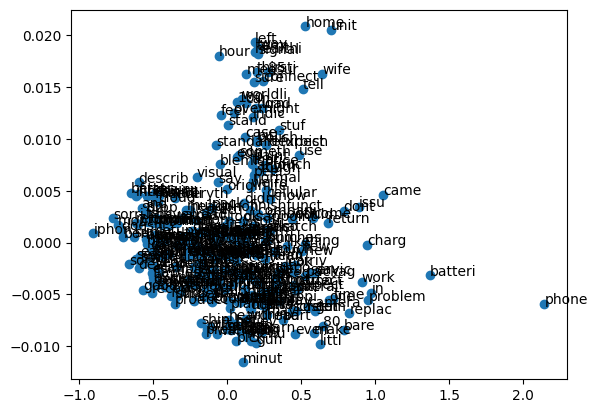

In [70]:
X = model.wv[model.wv.index_to_key]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.index_to_key)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

# **Question 4: Create your own training and evaluation data for sentiment analysis**

(15 points). **You dodn't need to write program for this question!** Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral). Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew. This datset will be used for assignment four: sentiment analysis and text classification. 


In [ ]:
# The GitHub link of your final csv file



# Link: https://github.com/SangeethaKaveti/sangeetha_INFO5731_Spring2023/blob/main/sentiment%20analysis.csv



